
### UNSW-NB15 Data set  EDA

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\Brook\\Desktop\\#SMU_Courses\\MSDS6120 CapstoneA\\ProjectData&NoteBook'

how to download the file directly from the web source rather than local source
https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/¶

In [4]:
#os.chdir('C:\\Users\\Brook\\Desktop\\#SMU_Courses\\## DS6120 CapstoneA\\ProjectData&NoteBook')
os.chdir('C:\\Users\\Brook\\Desktop\\#SMU_Courses\\MSDS6120 CapstoneA\\ProjectData&NoteBook')

In [141]:
train = pd.read_csv(r'UNSW_NB15_training_set.csv')
test = pd.read_csv(r'UNSW_NB15_testing_set.csv')
list_events = pd.read_csv(r'UNSW_NB15_LIST_EVENTS.csv')
features = pd.read_csv(r'UNSW_NB15_features.csv',encoding='latin1')

In [142]:
test.head(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [143]:
train.head(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


### Read the data

According to official site [here](https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/), train and test data have 175341 and 82332 rows respectively.

In [144]:
print(train.shape, test.shape)
if train.shape[0]<100000:
    print("Train test sets are reversed. Fixing them.")
    train, test = test, train

(175341, 45) (82332, 45)


In [145]:
train['type'] = 'train'
test['type'] ='test'
total = pd.concat([train, test], axis=0, ignore_index=True)
total.drop(['id'], axis=1, inplace=True)


In [279]:
test.head(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,type
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0,test
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0,test
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0,test
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0,test
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0,test


In [278]:
#train.tail(50)
train.head(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [147]:
train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,4.953000,6.948010,985.976864,88.216296,4.976254e+03,604.353826,116.257339,9.692504e+08,9.688770e+08,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2.144292e+03,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,66.005059,52.732999,7242.245841,987.093195,4.496585e+04,4061.043281,127.001024,1.355264e+09,1.354000e+09,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,5.420797e+04,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,0.000000,0.000000,0.279733,0.006000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,55.156896,51.053000,2.513295e+03,114.990625,255.000000,1.916651e+09,1.913675e+09,255.000000,0.065481,0.023268,0.038906,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,7.000000,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,84371.496000,56716.824000,1.460480e+06,289388.269700,255.000000,4.294959e+09,4.294882e+09,255.000000,2.518893,2.100352,1.520884,1504.000000,1458.000000,172.000000,6.558056e+06,63.000000,6.000000,51.000000,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


#Data statstics

df.head() df.tail() df.info() df.describe()

df.mean() df.median() df.max() df.min() df.std()

df.corr() df.count()

Text(0, 0.5, 'Frequency')

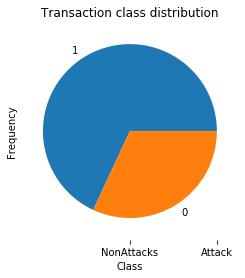

In [148]:
#train.drop(columns='attack_cat', inplace = True )
Attack= train [train ['label'] == 1]
NonAttack = train [train ['label'] == 0]
classes = pd.value_counts(train ['label'], sort = True)
output=train ['label']
train =train.iloc[:,:-1]

labels = ['NonAttacks','Attack']
classes.plot(kind = 'pie', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [149]:
output.value_counts()

1    119341
0     56000
Name: label, dtype: int64

In [150]:
train.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
id                   175341 non-null int64
dur                  175341 non-null float64
proto                175341 non-null object
service              175341 non-null object
state                175341 non-null object
spkts                175341 non-null int64
dpkts                175341 non-null int64
sbytes               175341 non-null int64
dbytes               175341 non-null int64
rate                 175341 non-null float64
sttl                 175341 non-null int64
dttl                 175341 non-null int64
sload                175341 non-null float64
dload                175341 non-null float64
sloss                175341 non-null int64
dloss                175341 non-null int64
sinpkt               175341 non-null float64
dinpkt               175341 non-null float64
sjit                 175341 non-null float64
djit                 175341 non-null float64
swin      

#Data cleansing

df.dropna() df.fillna() df.sort_values() 
df.groupby() df.apply() df.append() df.join() 
df.rename() df.set_index() df.to_csv()

Chacking the useability of the variables as a percentage

In [152]:
#row, column = train.shape
#train = round(((row - train.isnull().sum())/ row) * 100)
#train

In [153]:
train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
175336    False
175337    False
175338    False
175339    False
175340    False
Length: 175341, dtype: bool

### Test Data set

In [154]:
test.head(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,type
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0,test
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0,test
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0,test
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0,test
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0,test


# Utils

In [155]:
# optimizing the memory usage 

from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype
def reduce_mem_usage(train, use_float16=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = train.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in train.columns:
        if is_datetime(train[col]) or is_categorical_dtype(train[col]):
            # skip datetime type or categorical type
            continue
        col_type = train[col].dtype
        
        if col_type != object:
            c_min = train[col].min()
            c_max = train[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    train[col] = train[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    train[col] = train[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    train[col] = train[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    train[col] = train[col].astype(np.int64)  
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    train[col] = train[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    train[col] = train[col].astype(np.float32)
                else:
                    train[col] = train[col].astype(np.float64)
        else:
            train[col] = train[col].astype('object')

    end_mem = train.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return train

In [156]:
def standardize(train):
    return (train-train.mean())/df.std()
    
def min_max(df):
    return (train-train.min())/(train.max() - train.min())

def normalize(train):
    return pd.Dataframe(preprocessing.normalize(df), columns=train.columns)

In [157]:
total = reduce_mem_usage(total)

Memory usage of dataframe is 88.47 MB
Memory usage after optimization is: 36.12 MB
Decreased by 59.2%


# List of Events

In [158]:
list_events.shape

(208, 3)

In [159]:
list_events.head()

,Attack category,Attack subcategory,Number of events
0,normal,NaN,2218761
1,Fuzzers,FTP,558
2,Fuzzers,HTTP,1497
3,Fuzzers,RIP,3550
4,Fuzzers,SMB,5245


In [160]:
list_events['Attack category'].unique()

array(['normal', ' Fuzzers ', ' Fuzzers', ' Reconnaissance ',
       ' Shellcode ', 'Analysis', 'Backdoors', 'DoS', 'Exploits',
       'Generic', 'Reconnaissance', 'Shellcode', 'Worms', nan],
      dtype=object)

In [161]:
list_events['Attack subcategory'].unique()

array([nan, 'FTP', 'HTTP', 'RIP', 'SMB', 'Syslog', 'PPTP', ' FTP',
       'DCERPC', 'OSPF', 'TFTP', ' DCERPC ', ' OSPF', 'BGP', 'Telnet',
       'SNMP', ' SunRPC Portmapper (TCP) UDP Service',
       ' SunRPC Portmapper (TCP) TCP Service ',
       'SunRPC Portmapper (UDP) UDP Service', 'NetBIOS', 'DNS',
       'SunRPC Portmapper (UDP)', ' ICMP', ' SCTP', 'MSSQL', 'SMTP',
       'FreeBSD', 'HP-UX ', 'NetBSD ', 'AIX', 'SCO Unix', 'Linux',
       'Decoders', 'IRIX', 'OpenBSD', ' Mac OS X', 'BSD', 'Windows',
       'BSDi', 'Multiple OS', 'Solaris', 'HTML', 'Port Scanner', 'Spam ',
       ' ', ' Ethernet', ' Microsoft Office', ' VNC', 'IRC', 'RDP', 'TCP',
       'VNC', ' LDAP', ' Oracle ', ' TCP', ' TFTP', 'XINETD', ' IRC',
       ' SNMP', 'ISAKMP', 'NTP', 'CUPS', 'Hypervisor', 'ICMP', 'SunRPC',
       ' IMAP', 'Asterisk', 'Browser', 'Cisco Skinny', 'SIP', 'SSL',
       ' SMTP', 'IIS Web Server', 'Miscellaneous', 'RTSP',
       ' Common Unix Print System (CUPS)', ' SunRPC', 'IGMP',
       '

# Features

In [162]:
features.head(features.shape[0])

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [163]:
# the Name column has camel case values
features['Name'] = features['Name'].str.lower()
# the following 4 columns are address related and not in train dataset
features = features[~features['Name'].isin(['srcip', 'sport', 'dstip', 'dsport'])].reset_index()
features.drop(['index', 'No.'], axis=1, inplace=True)


# Data

In [164]:
normal = train[train['label']==0]
anomaly = train[train['label']==1]

In [165]:
normal.head(5)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [166]:
anomaly.head(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
47911,47912,0.000009,ddp,-,INT,2,0,200,0,111111.1072,254,0,88888888.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,100,0,0,0,4,2,1,1,1,4,0,0,0,2,4,0,Backdoor,1
47912,47913,0.000009,ipv6-frag,-,INT,2,0,200,0,111111.1072,254,0,88888888.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,100,0,0,0,7,2,2,2,2,7,0,0,0,2,7,0,Backdoor,1
47913,47914,0.000009,cftp,-,INT,2,0,200,0,111111.1072,254,0,88888888.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,100,0,0,0,6,2,1,1,1,6,0,0,0,1,6,0,Backdoor,1
47914,47915,0.000003,wsn,-,INT,2,0,200,0,333333.3215,254,0,266666656.0,0.0,0,0,0.003,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,100,0,0,0,6,2,2,2,2,7,0,0,0,2,6,0,Backdoor,1
47915,47916,0.000008,pvp,-,INT,2,0,200,0,125000.0003,254,0,100000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,100,0,0,0,4,2,1,1,1,4,0,0,0,11,4,0,Backdoor,1


## Some difference with features file

In [167]:
print(sorted(set(train.columns) - set(features['Name'].values)))
print(sorted(set(features['Name'].values) - set(train.columns)))

['ct_src_ltm', 'dinpkt', 'dmean', 'id', 'rate', 'response_body_len', 'sinpkt', 'smean']
['ct_src_ ltm', 'dintpkt', 'dmeansz', 'ltime', 'res_bdy_len', 'sintpkt', 'smeansz', 'stime']


Some of the column names in features file are wrong and we are going to fix them. 

In [168]:
fix = {'ct_src_ ltm': 'ct_src_ltm', 'dintpkt': 'dinpkt', 'dmeansz': 'dmean', 'res_bdy_len': 'response_body_len', 'sintpkt': 'sinpkt', 'smeansz': 'smean'}
features['Name'] = features['Name'].apply(lambda x: fix[x] if x in fix else x)
features.to_csv('features.csv')

In [169]:
print(sorted(set(train.columns) - set(features['Name'].values)))
print(sorted(set(features['Name'].values) - set(train.columns)))

['id', 'rate']
['ltime', 'stime']


Still there are some differences. `stime` and `ltime` both refers to when the recording stared and lasted. So they shouldn't be valuable in training, hence not being in train set makes sence. `id` is just row number and rate might be something related to packed sending speed or data rate.

## Checking data types

In [170]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [171]:
train.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

* categorical: state, service, proto
* target  = attack_cat, label
* integer but categorial = is_sm_ips_ports, ct_state_ttl, is_ftp_login
* integer = spkts, dpkts, sbytes, dbytes, sttl, dttl, sload, dload, sloss, dloss, swin, dwin, stcpb, dtcpb, smean, dmean, trans_depth, response_body_len, ct_srv_src, ct_state_ttl, ct_dst_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm, ct_ftp_cmd, ct_flw_http_mthd, ct_src_ltm, ct_srv_dst, 
* decimal = dur, rate, sinpkt, dinpkt, sjit, djit, tcprtt, synack, ackdat

# Correlation matrix


In [172]:
def show_correlation(data, method='pearson'):
    correlation_matrix = data.corr(method='pearson') #  ‘pearson’, ‘kendall’, ‘spearman’
    fig = plt.figure(figsize=(12,9))
    sns.heatmap(correlation_matrix,vmax=0.8,square = True) #  annot=True, if fig should show the correlation score too
    plt.show()
    return correlation_matrix

def top_correlations(correlations, limit=0.9):
    columns = correlations.columns
    for i in range(correlations.shape[0]):
        for j in range(i+1, correlations.shape[0]):
            if correlations.iloc[i,j] >= limit:
                print(f"{columns[i]} {columns[j]} {correlations.iloc[i,j]}")
def print_correlations(correlations, col1=None, col2=None):
    columns = correlations.columns
    for i in range(correlations.shape[0]):
        for j in range(i+1, correlations.shape[0]):
            if (col1 == None or col1==columns[i]) and (col2 == None or col2==columns[j]):
                print(f"{columns[i]} {columns[j]} {correlations.iloc[i,j]}")
                return
            elif (col1 == None or col1==columns[j]) and (col2 == None or col2==columns[i]):
                print(f"{columns[i]} {columns[j]} {correlations.iloc[i,j]}")
                return
            
def find_corr(df1, df2):
    return pd.concat([df1, df2], axis=1).corr().iloc[0,1]

def corr(col1, col2='label', df=total):
    return pd.concat([df[col1], df[col2]], axis=1).corr().iloc[0,1]

## Pearson

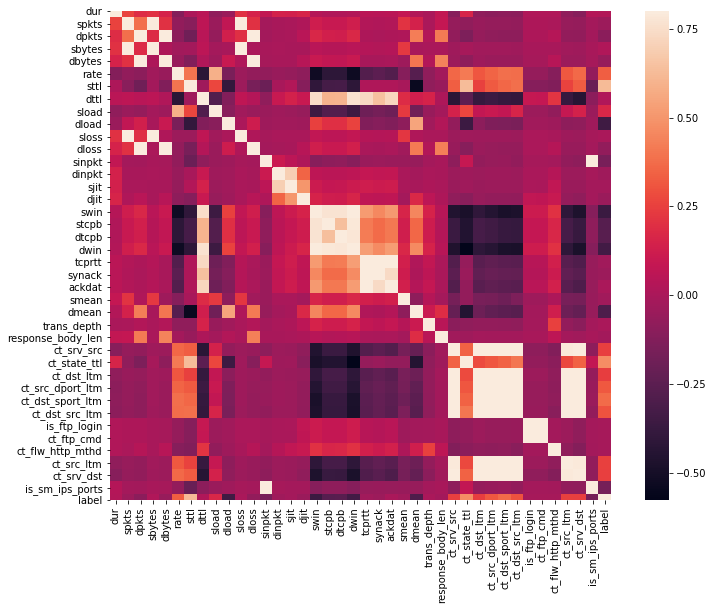

In [173]:
correlation_matrix = show_correlation(total)

In [174]:
# we identified highly correlated varriables ,

top_correlations(correlation_matrix, limit=0.9)

spkts sbytes 0.9643932171545158
spkts sloss 0.9718594116472338
dpkts dbytes 0.9734453279770948
dpkts dloss 0.97961208493901
sbytes sloss 0.9957715772406215
dbytes dloss 0.9967111338320517
sinpkt is_sm_ips_ports 0.9421206233368904
swin dwin 0.9804584289089485
tcprtt synack 0.9430527537676368
tcprtt ackdat 0.9202175912517119
ct_srv_src ct_dst_src_ltm 0.9539519771677271
ct_srv_src ct_srv_dst 0.9794668130717727
ct_dst_ltm ct_src_dport_ltm 0.9615176986582984
ct_dst_ltm ct_src_ltm 0.9015817705707642
ct_src_dport_ltm ct_dst_sport_ltm 0.9083371617431901
ct_src_dport_ltm ct_src_ltm 0.9094302805381564
ct_dst_src_ltm ct_srv_dst 0.9603212131063932
is_ftp_login ct_ftp_cmd 0.9988554882922012


## Spearman

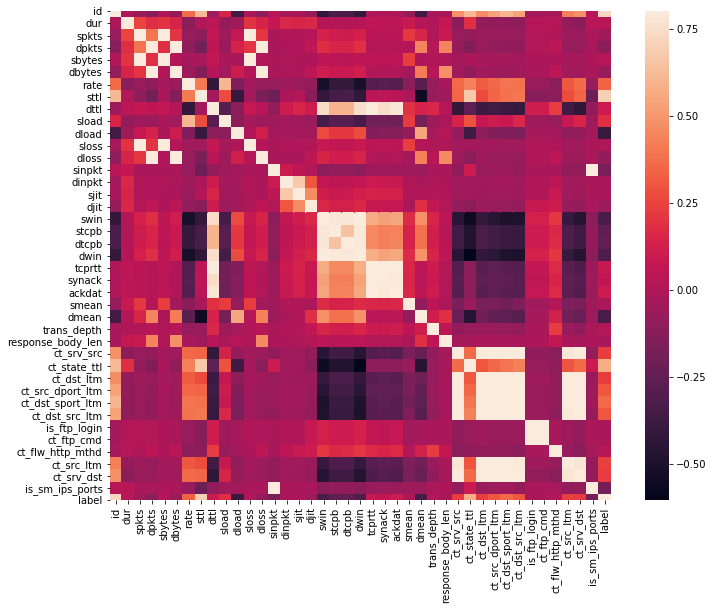

In [175]:
correlation_matrix = show_correlation(train, method='spearman')

In [176]:
top_correlations(correlation_matrix, limit=0.9)

spkts sbytes 0.9637905453632948
spkts sloss 0.9710686917734201
dpkts dbytes 0.9719070079937576
dpkts dloss 0.9786363765707413
sbytes sloss 0.9961094729162718
dbytes dloss 0.9965035947658807
sinpkt is_sm_ips_ports 0.94131890073567
swin dwin 0.9901399299450626
tcprtt synack 0.9494676611036721
tcprtt ackdat 0.9417603738099295
ct_srv_src ct_dst_src_ltm 0.9671378245459187
ct_srv_src ct_srv_dst 0.980323009991157
ct_dst_ltm ct_src_dport_ltm 0.9620518416457033
ct_src_dport_ltm ct_dst_sport_ltm 0.9067931558833536
ct_dst_src_ltm ct_srv_dst 0.9723704538695266
is_ftp_login ct_ftp_cmd 1.0


Most correlated features are :
* spkts, sbytes, sloss 
* dpkts, dbytes, dloss
* sinpkt, is_sm_ips_ports
* swin, dwin
* tcprtt, synack
* ct_srv_src, ct_srv_dst, ct_dst_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm 
* is_ftp_login ct_ftp_cmd

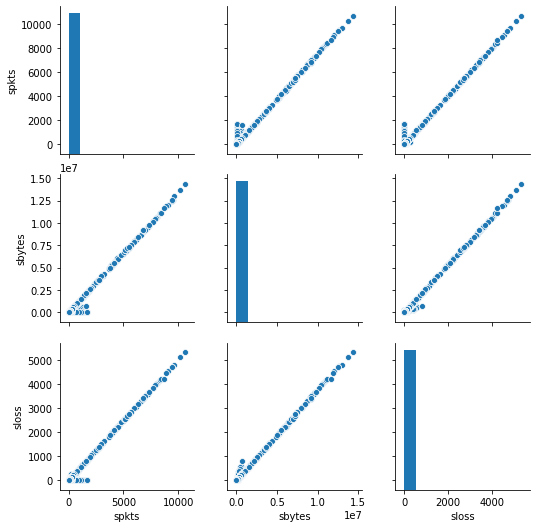

In [177]:
sns.pairplot(total[['spkts', 'sbytes', 'sloss']])

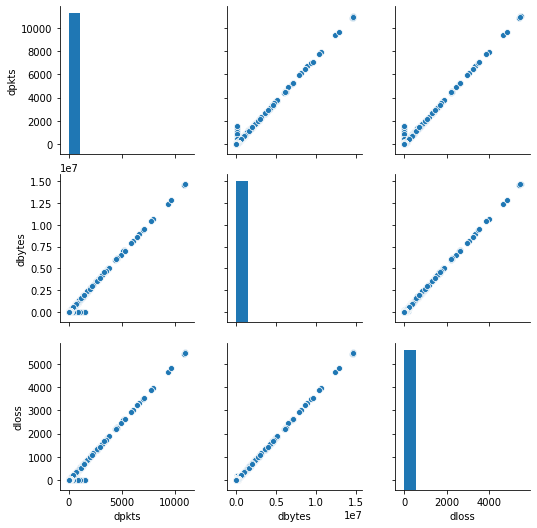

In [178]:
sns.pairplot(total[['dpkts', 'dbytes', 'dloss']])

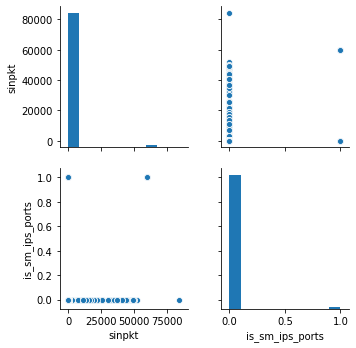

In [179]:
sns.pairplot(total[['sinpkt', 'is_sm_ips_ports']])

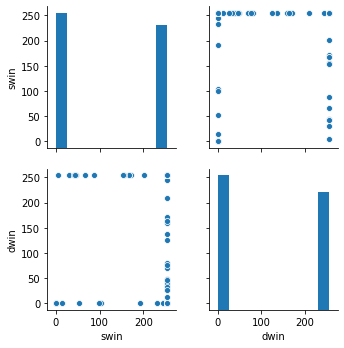

In [180]:
sns.pairplot(total[['swin', 'dwin']])

### plot utils

In [181]:
def dual_plot(col, data1=normal, data2=anomaly, label1='normal', label2='anomaly', method=None):
    if method != None:
        sns.distplot(data1[col].apply(method), label=label1, hist=False, rug=True)
        sns.distplot(data2[col].apply(method), label=label2, hist=False, rug=True)
    else:
        sns.distplot(data1[col], label=label1, hist=False, rug=True)
        sns.distplot(data2[col], label=label2, hist=False, rug=True)
    plt.legend()
    
def catplot(data, col):
    ax = sns.catplot(x=col, hue="label", col="type",data=data, kind="count", height=5, legend=False, aspect=1.4)
    ax.set_titles("{col_name}")
    ax.add_legend(loc='upper right',labels=['normal','attack'])
    plt.show(ax)

In [186]:
# append test and train data set
#del df1
#del df
#test.head(5)
#train.head(5)
df  = test.append(train)
#df1  = test.append(train)

In [187]:
pd.options.display.max_columns = None
display(df)

,ackdat,attack_cat,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_flw_http_mthd,ct_ftp_cmd,ct_src_dport_ltm,ct_src_ltm,ct_srv_dst,ct_srv_src,ct_state_ttl,dbytes,dinpkt,djit,dload,dloss,dmean,dpkts,dtcpb,dttl,dur,dwin,id,is_ftp_login,is_sm_ips_ports,label,proto,rate,response_body_len,sbytes,service,sinpkt,sjit,sload,sloss,smean,spkts,state,stcpb,sttl,swin,synack,tcprtt,trans_depth,type
0,0.000000,Normal,1,1,2,0,0,1,1,2,2,2,0,0.00000,0.000000,0.000000,0,0,0,0,0,0.000011,0,1,0,0,0,udp,90909.090200,0,496,-,0.011000,0.000000,1.803636e+08,0,248,2,INT,0,254,0,0.000000,0.00000,0,test
1,0.000000,Normal,1,1,2,0,0,1,1,2,2,2,0,0.00000,0.000000,0.000000,0,0,0,0,0,0.000008,0,2,0,0,0,udp,125000.000300,0,1762,-,0.008000,0.000000,8.810000e+08,0,881,2,INT,0,254,0,0.000000,0.00000,0,test
2,0.000000,Normal,1,1,3,0,0,1,1,3,3,2,0,0.00000,0.000000,0.000000,0,0,0,0,0,0.000005,0,3,0,0,0,udp,200000.005100,0,1068,-,0.005000,0.000000,8.544000e+08,0,534,2,INT,0,254,0,0.000000,0.00000,0,test
3,0.000000,Normal,2,1,3,0,0,2,2,3,3,2,0,0.00000,0.000000,0.000000,0,0,0,0,0,0.000006,0,4,0,0,0,udp,166666.660800,0,900,-,0.006000,0.000000,6.000000e+08,0,450,2,INT,0,254,0,0.000000,0.00000,0,test
4,0.000000,Normal,2,1,3,0,0,2,2,3,3,2,0,0.00000,0.000000,0.000000,0,0,0,0,0,0.000010,0,5,0,0,0,udp,100000.002500,0,2126,-,0.010000,0.000000,8.504000e+08,0,1063,2,INT,0,254,0,0.000000,0.00000,0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000000,Generic,24,13,24,0,0,24,24,24,24,2,0,0.00000,0.000000,0.000000,0,0,0,0,0,0.000009,0,175337,0,0,1,udp,111111.107200,0,114,dns,0.009000,0.000000,5.066666e+07,0,57,2,INT,0,254,0,0.000000,0.00000,0,NaN
175337,0.062545,Shellcode,1,1,2,0,0,1,1,1,1,1,354,66.98057,120.177727,4903.492188,1,44,8,3453092386,252,0.505762,255,175338,0,0,1,tcp,33.612649,0,620,-,54.400111,3721.068786,8.826286e+03,2,62,10,FIN,3518776216,254,255,0.036895,0.09944,0,NaN
175338,0.000000,Generic,3,3,13,0,0,3,3,12,12,2,0,0.00000,0.000000,0.000000,0,0,0,0,0,0.000009,0,175339,0,0,1,udp,111111.107200,0,114,dns,0.009000,0.000000,5.066666e+07,0,57,2,INT,0,254,0,0.000000,0.00000,0,NaN
175339,0.000000,Generic,30,14,30,0,0,30,30,30,30,2,0,0.00000,0.000000,0.000000,0,0,0,0,0,0.000009,0,175340,0,0,1,udp,111111.107200,0,114,dns,0.009000,0.000000,5.066666e+07,0,57,2,INT,0,254,0,0.000000,0.00000,0,NaN


In [188]:
# Obj_df is a sub data frame of catagorical varriables with object data type 
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,attack_cat,proto,service,state,type
0,Normal,udp,-,INT,test
1,Normal,udp,-,INT,test
2,Normal,udp,-,INT,test
3,Normal,udp,-,INT,test
4,Normal,udp,-,INT,test


In [189]:
List_Of_Categories_In_Column=list(df['proto'].value_counts().index)
List_Of_Categories_In_Column

['tcp',
 'udp',
 'unas',
 'arp',
 'ospf',
 'sctp',
 'any',
 'gre',
 'rsvp',
 'ipv6',
 'sun-nd',
 'swipe',
 'pim',
 'mobile',
 'sep',
 'leaf-1',
 'xns-idp',
 'prm',
 'pipe',
 'i-nlsp',
 'trunk-2',
 'scps',
 'compaq-peer',
 'il',
 'igp',
 'idpr',
 'gmtp',
 'sat-expak',
 'ipv6-opts',
 'xnet',
 'mux',
 'l2tp',
 'snp',
 'nvp',
 'ipnip',
 'fc',
 'bna',
 'br-sat-mon',
 'mtp',
 'skip',
 'isis',
 'iso-tp4',
 'nsfnet-igp',
 'encap',
 'crudp',
 'pnni',
 'tcf',
 'ax.25',
 'sps',
 'eigrp',
 'ipv6-no',
 'merit-inp',
 'rvd',
 'wb-expak',
 'ipx-n-ip',
 'tp++',
 'ifmp',
 'pgm',
 'ipcomp',
 'smp',
 'narp',
 'iplt',
 'srp',
 'vrrp',
 'irtp',
 'ddx',
 'ib',
 'etherip',
 'bbn-rcc',
 'uti',
 'sprite-rpc',
 'ggp',
 'ippc',
 'iatp',
 'dcn',
 'pvp',
 'cpnx',
 'idrp',
 'aris',
 'ipcv',
 'visa',
 'emcon',
 'zero',
 'cphb',
 'mfe-nsp',
 'sm',
 'vmtp',
 'fire',
 'idpr-cmtp',
 'leaf-2',
 'ipip',
 'cbt',
 'cftp',
 'iso-ip',
 'stp',
 'aes-sp3-d',
 'tlsp',
 'kryptolan',
 'ptp',
 'wsn',
 'wb-mon',
 'chaos',
 'pri-enc',

In [190]:

List_Of_Categories_In_Column=list(df['attack_cat'].value_counts().index)
List_Of_Categories_In_Column

['Normal',
 'Generic',
 'Exploits',
 'Fuzzers',
 'DoS',
 'Reconnaissance',
 'Analysis',
 'Backdoor',
 'Shellcode',
 'Worms']

In [191]:
# how do we address , for varriables with multiple catagry types for instance for coloumn "proto"
 https://www.quora.com/How-can-we-deal-with-Categorical-Variables-with-Many-Levels-100-efficiently-in-a-regression-What-methods-are-there-to-reduce-the-number-of-levels
# 
obj_df["proto"].value_counts().head(50)

tcp            123041
udp             92701
unas            15599
arp              3846
ospf             3271
sctp             1474
any               396
gre               313
rsvp              264
ipv6              262
sun-nd            255
swipe             253
pim               253
mobile            253
sep               251
leaf-1            133
xns-idp           133
prm               133
pipe              132
i-nlsp            132
trunk-2           132
scps              132
compaq-peer       132
il                132
igp               132
idpr              132
gmtp              132
sat-expak         132
ipv6-opts         132
xnet              132
mux               132
l2tp              132
snp               132
nvp               132
ipnip             132
fc                132
bna               132
br-sat-mon        132
mtp               132
skip              132
isis              132
iso-tp4           132
nsfnet-igp        132
encap             132
crudp             132
pnni      

In [192]:
df.dtypes

ackdat               float64
attack_cat            object
ct_dst_ltm             int64
ct_dst_sport_ltm       int64
ct_dst_src_ltm         int64
ct_flw_http_mthd       int64
ct_ftp_cmd             int64
ct_src_dport_ltm       int64
ct_src_ltm             int64
ct_srv_dst             int64
ct_srv_src             int64
ct_state_ttl           int64
dbytes                 int64
dinpkt               float64
djit                 float64
dload                float64
dloss                  int64
dmean                  int64
dpkts                  int64
dtcpb                  int64
dttl                   int64
dur                  float64
dwin                   int64
id                     int64
is_ftp_login           int64
is_sm_ips_ports        int64
label                  int64
proto                 object
rate                 float64
response_body_len      int64
sbytes                 int64
service               object
sinpkt               float64
sjit                 float64
sload         

In [193]:
# label encoding the catagorical coloumn "proto"
obj_df["proto"] = df["proto"].astype('category')
obj_df["service"] = df["service"].astype('category')
obj_df["state"] = df["state"].astype('category')
obj_df.dtypes


attack_cat      object
proto         category
service       category
state         category
type            object
dtype: object

In [194]:
# we are appending test and train data , clean it up , change catagoriacal varriables to label encoding and later in the model
# we will split 80% , 20% to address imbalance in the data set 
# we used label encoding rather than the hot encoding to avoid creating 100s of new coloumns to our data frames
# though there is a problem with label encoding as the model might consider numerical values as weights 

obj_df["protocol_type"] = obj_df["proto"].cat.codes
obj_df.head(50)

,attack_cat,proto,service,state,type,protocol_type
0,Normal,udp,-,INT,test,119
1,Normal,udp,-,INT,test,119
2,Normal,udp,-,INT,test,119
3,Normal,udp,-,INT,test,119
4,Normal,udp,-,INT,test,119
5,Normal,udp,-,INT,test,119
6,Normal,udp,-,INT,test,119
7,Normal,udp,-,INT,test,119
8,Normal,arp,-,INT,test,6
9,Normal,arp,-,INT,test,6


In [199]:
df["proto"] = df["proto"].astype('category')
df["service"] = df["service"].astype('category')
df["state"] = df["state"].astype('category')

In [202]:
df["protocol_type"] = df["proto"].cat.codes
df["service_type"] = df["service"].cat.codes
df["state_type"] = df["state"].cat.codes
df.head(50)

,ackdat,attack_cat,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_flw_http_mthd,ct_ftp_cmd,ct_src_dport_ltm,ct_src_ltm,ct_srv_dst,ct_srv_src,ct_state_ttl,dbytes,dinpkt,djit,dload,dloss,dmean,dpkts,dtcpb,dttl,dur,dwin,id,is_ftp_login,is_sm_ips_ports,label,proto,rate,response_body_len,sbytes,service,sinpkt,sjit,sload,sloss,smean,spkts,state,stcpb,sttl,swin,synack,tcprtt,trans_depth,type,protocol_type,service_type,state_type
0,0.000000,Normal,1,1,2,0,0,1,1,2,2,2,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000011,0,1,0,0,0,udp,90909.090200,0,496,-,0.011000,0.000000,1.803636e+08,0,248,2,INT,0,254,0,0.000000,0.000000,0,test,119,0,5
1,0.000000,Normal,1,1,2,0,0,1,1,2,2,2,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000008,0,2,0,0,0,udp,125000.000300,0,1762,-,0.008000,0.000000,8.810000e+08,0,881,2,INT,0,254,0,0.000000,0.000000,0,test,119,0,5
2,0.000000,Normal,1,1,3,0,0,1,1,3,3,2,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000005,0,3,0,0,0,udp,200000.005100,0,1068,-,0.005000,0.000000,8.544000e+08,0,534,2,INT,0,254,0,0.000000,0.000000,0,test,119,0,5
3,0.000000,Normal,2,1,3,0,0,2,2,3,3,2,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000006,0,4,0,0,0,udp,166666.660800,0,900,-,0.006000,0.000000,6.000000e+08,0,450,2,INT,0,254,0,0.000000,0.000000,0,test,119,0,5
4,0.000000,Normal,2,1,3,0,0,2,2,3,3,2,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000010,0,5,0,0,0,udp,100000.002500,0,2126,-,0.010000,0.000000,8.504000e+08,0,1063,2,INT,0,254,0,0.000000,0.000000,0,test,119,0,5
5,0.000000,Normal,2,1,2,0,0,2,2,2,2,2,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000003,0,6,0,0,0,udp,333333.321500,0,784,-,0.003000,0.000000,1.045333e+09,0,392,2,INT,0,254,0,0.000000,0.000000,0,test,119,0,5
6,0.000000,Normal,2,1,2,0,0,2,2,2,2,2,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000006,0,7,0,0,0,udp,166666.660800,0,1960,-,0.006000,0.000000,1.306667e+09,0,980,2,INT,0,254,0,0.000000,0.000000,0,test,119,0,5
7,0.000000,Normal,1,1,3,0,0,1,1,3,3,2,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000028,0,8,0,0,0,udp,35714.285220,0,1384,-,0.028000,0.000000,1.977143e+08,0,692,2,INT,0,254,0,0.000000,0.000000,0,test,119,0,5
8,0.000000,Normal,2,2,2,0,0,2,2,2,2,2,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0,9,0,1,0,arp,0.000000,0,46,-,60000.688000,0.000000,0.000000e+00,0,46,1,INT,0,0,0,0.000000,0.000000,0,test,6,0,5
9,0.000000,Normal,2,2,2,0,0,2,2,2,2,2,0,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0,10,0,1,0,arp,0.000000,0,46,-,60000.712000,0.000000,0.000000e+00,0,46,1,INT,0,0,0,0.000000,0.000000,0,test,6,0,5


In [203]:
df.dtypes

ackdat                float64
attack_cat             object
ct_dst_ltm              int64
ct_dst_sport_ltm        int64
ct_dst_src_ltm          int64
ct_flw_http_mthd        int64
ct_ftp_cmd              int64
ct_src_dport_ltm        int64
ct_src_ltm              int64
ct_srv_dst              int64
ct_srv_src              int64
ct_state_ttl            int64
dbytes                  int64
dinpkt                float64
djit                  float64
dload                 float64
dloss                   int64
dmean                   int64
dpkts                   int64
dtcpb                   int64
dttl                    int64
dur                   float64
dwin                    int64
id                      int64
is_ftp_login            int64
is_sm_ips_ports         int64
label                   int64
proto                category
rate                  float64
response_body_len       int64
sbytes                  int64
service              category
sinpkt                float64
sjit      

### the following coloumns from our updated data frame have non continous data type , 
---

proto                category

service              category

state                category

type                   object

---

## Label
0 for normal and 1 for non normal catagories (attack types) 

## EDA on Catagorical varriables 

In [204]:
List_Of_Categories_In_Column=list(df['attack_cat'].value_counts().index)
List_Of_Categories_In_Column

['Normal',
 'Generic',
 'Exploits',
 'Fuzzers',
 'DoS',
 'Reconnaissance',
 'Analysis',
 'Backdoor',
 'Shellcode',
 'Worms']

In [ ]:
def create_count_df(col, data=total):
    df = pd.DataFrame(data[col].value_counts().reset_index().values, columns = [col, 'count'])
    df['percent'] = df['count'].values*100/data.shape[0]
    return df.sort_values(by='percent', ascending=False)

In [46]:
create_count_df('label', train)

,label,count,percent
0,1,119341,68.062233
1,0,56000,31.937767


In [205]:
#is this data imbalance data ?
#if so refer how to deal with imbalance data 
#https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

In [47]:
create_count_df('label', test)

,label,count,percent
0,1,45332,55.060001
1,0,37000,44.939999


So it seems the dataset is pretty balanced, unlike real world data where attack scenarios are rare. Moreover, here attack connections are more than normal connections.

## State
Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)

In [207]:
List_Of_Categories_In_Column=list(df['state'].value_counts().index)
List_Of_Categories_In_Column
# refer to data dictionary what each variable and catagory means 
# https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/
# refer to  UNSW-NB15_features.csv for the data dictionary in the above website 

['FIN', 'INT', 'CON', 'REQ', 'RST', 'ECO', 'ACC', 'no', 'URN', 'PAR', 'CLO']

In [48]:
col = 'state'
create_count_df(col, train)

,state,count,percent
0,INT,82275,46.9229
1,FIN,77825,44.3849
2,CON,13152,7.50081
3,REQ,1991,1.1355
4,RST,83,0.0473363
5,ECO,12,0.00684381
6,URN,1,0.000570317
7,PAR,1,0.000570317
8,no,1,0.000570317


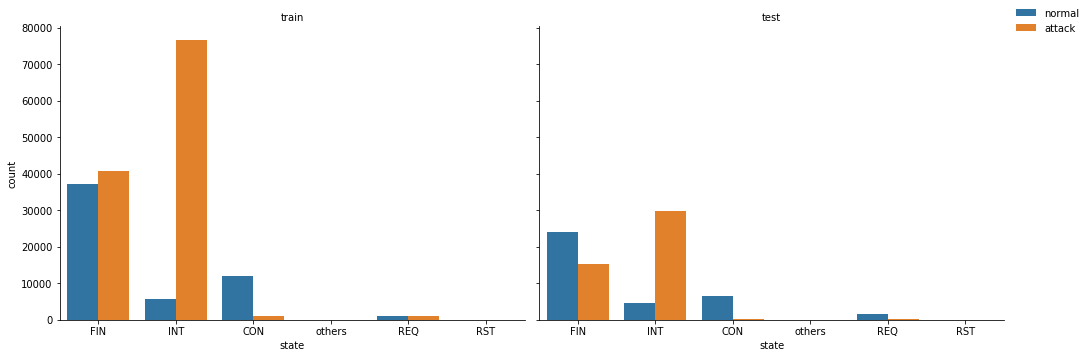

In [49]:
# all other values those were few in train set, have been renamed to 'RST_and_others'
total.loc[~total[col].isin(['FIN', 'INT', 'CON', 'REQ', 'RST']), col] = 'others'
catplot(total, col)
# catplot(total[~total[col].isin(['INT', 'FIN', 'REQ', 'CON'])], col)

## Service
http, ftp, smtp, ssh, dns, ftp-data ,irc  and (-) if not much used service. More than half of the service data are of - category. 

In [50]:
col = 'service'
create_count_df(col, train)

,service,count,percent
0,-,94168,53.7056
1,dns,47294,26.9726
2,http,18724,10.6786
3,smtp,5058,2.88466
4,ftp-data,3995,2.27842
5,ftp,3428,1.95505
6,ssh,1302,0.742553
7,pop3,1105,0.630201
8,dhcp,94,0.0536098
9,snmp,80,0.0456254


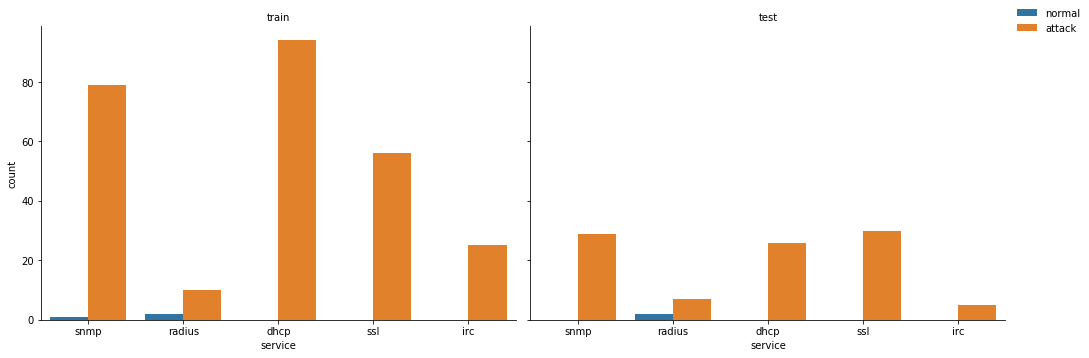

In [51]:
catplot(total[~total[col].isin(['-', 'dns', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3'])], col)

In [52]:
total.loc[~total[col].isin(['-', 'dns', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3']), col] = 'others'

## proto
Transaction protocol. Normal connections of train data have only 5 protocols, where anomaly connections have 129. So we'll convert all other protocols into same value.

In [53]:
col = 'proto'
create_count_df(col, normal)

,proto,count,percent
0,tcp,39121,69.8589
1,udp,13922,24.8607
2,arp,2859,5.10536
3,ospf,64,0.114286
4,igmp,18,0.0321429
5,icmp,15,0.0267857
6,rtp,1,0.00178571


In [54]:
create_count_df(col, anomaly)[:10]

,proto,count,percent
0,udp,49361,41.3613
1,tcp,40825,34.2087
2,unas,12084,10.1256
3,ospf,2531,2.12081
4,sctp,1150,0.963625
5,any,300,0.25138
6,gre,225,0.188535
7,sun-nd,201,0.168425
8,ipv6,201,0.168425
9,pim,201,0.168425


In [55]:
# icmp and rtp columns are in test, but not in train data
total.loc[total[col].isin(['igmp', 'icmp', 'rtp']), col] = 'igmp_icmp_rtp'
total.loc[~total[col].isin(['tcp', 'udp', 'arp', 'ospf', 'igmp_icmp_rtp']), col] = 'others'

## is_sm_ips_ports
If source and destination IP addresses equal and port numbers (sport/dport)  equal then, this variable takes value 1 else 0. Seems if it is 1, then the connection is always normal. This feature is highly correlated with sinpkt (0.94131890073567).

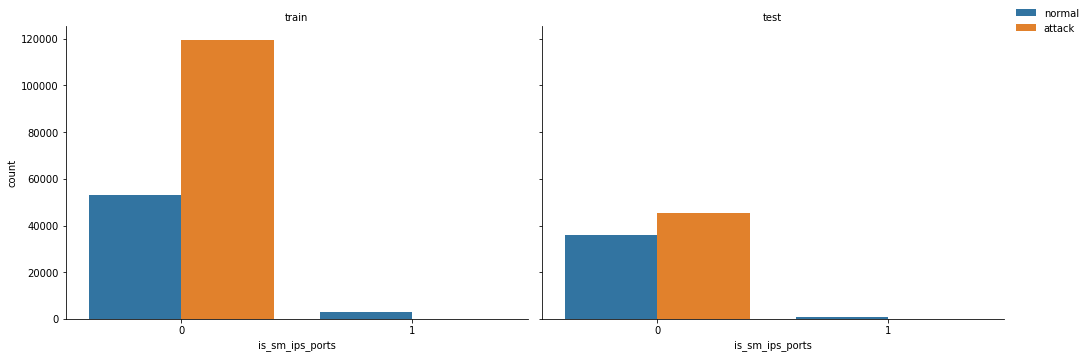

In [56]:
catplot(total, 'is_sm_ips_ports')

## is_ftp_login
If the ftp session is accessed by user and password then 1 else 0. In most of the cases session has no user and password. However there are values 2 and 4 which should not be there.

This feature is totally correlated with ct_ftp_cmd, which counts the number of ftp commands. So dropping this column should be ok.

0.9988554882922012 -0.008761579814961321


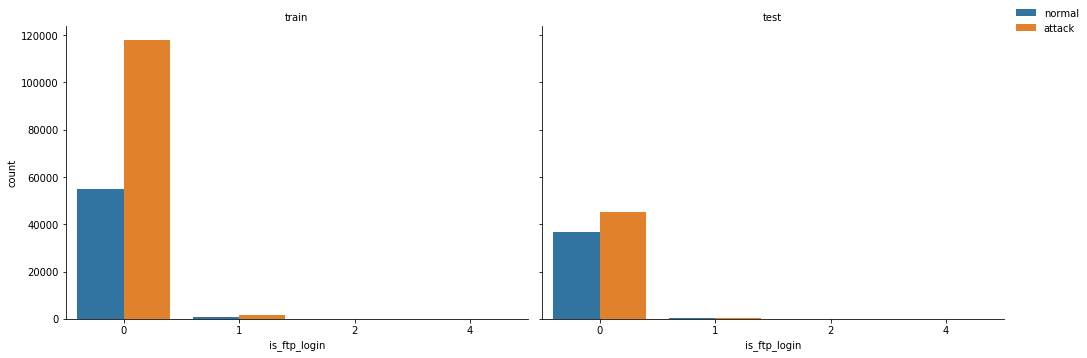

In [57]:
col = 'is_ftp_login'
print(corr('ct_ftp_cmd', col), corr('is_ftp_login', 'label'))
catplot(total, col)
total.drop([col], axis=1, inplace=True)

# EDA on Integer Features
## ct_state_ttl
No. for each state according to specific range of values for source/destination time to live (sttl/dttl).

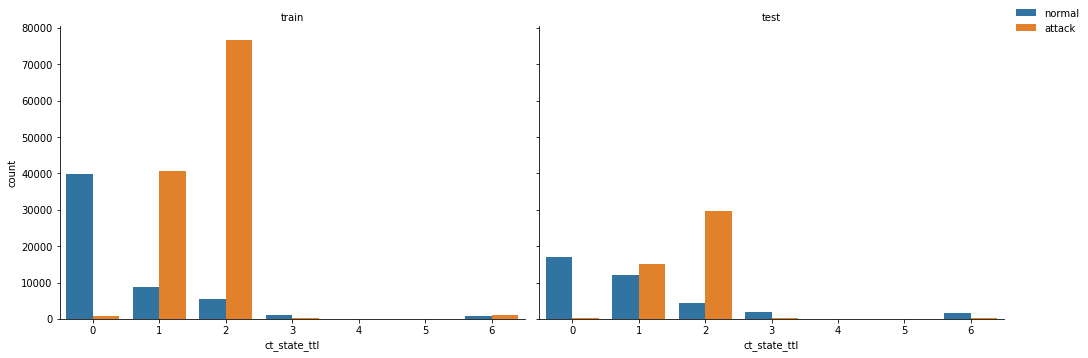

In [58]:
col = 'ct_state_ttl'
catplot(total, col)

## ct_ftp_cmd
No of flows that has a command in ftp session. It has a very low correlation with target. Also is_ftp_login is highly correlated with it (0.9988554882922012).

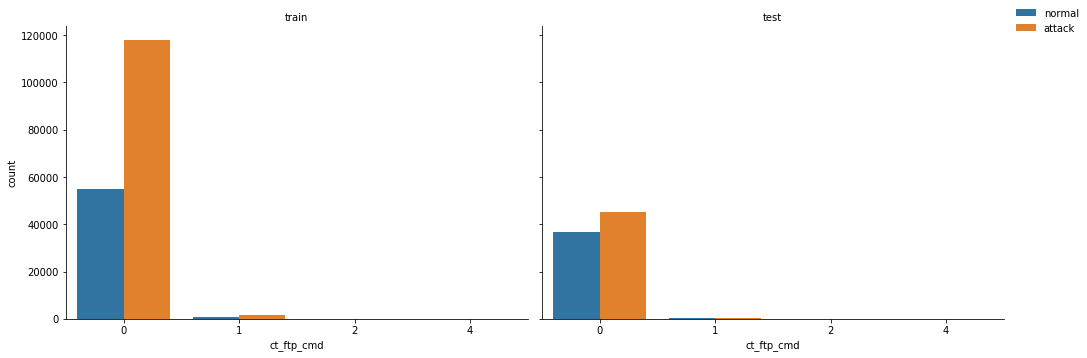

-0.009091577232622904

In [59]:
catplot(total, 'ct_ftp_cmd')
corr('ct_ftp_cmd', 'label')

## ct_flw_http_mthd
No. of flows that has methods such as Get and Post in http service. Seems 0 has more anomaly values, however the correlation is very small with target.

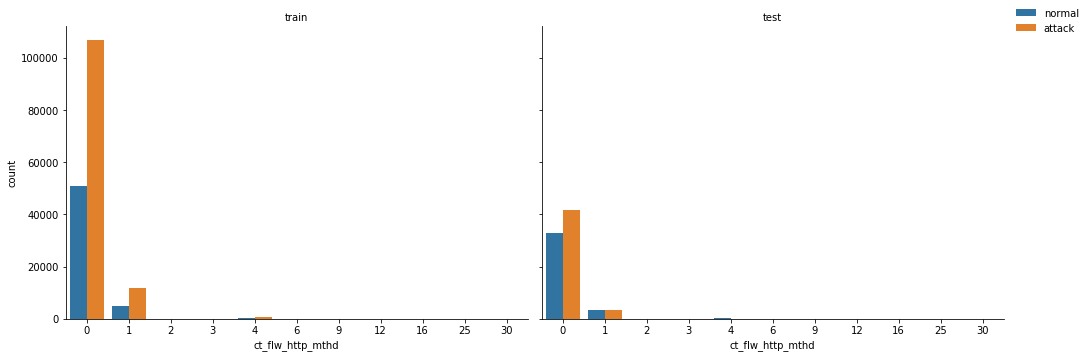

-0.012237160723248125

In [60]:
col = 'ct_flw_http_mthd'
catplot(total, col)
corr(col) # -0.012237160723

In [61]:
create_count_df(col, total)

,ct_flw_http_mthd,count,percent
0,0,232253,90.134783
1,1,23604,9.160448
2,4,1324,0.513830
3,9,216,0.083827
4,2,92,0.035704
5,16,48,0.018628
6,6,42,0.016300
7,12,36,0.013971
8,30,30,0.011643
9,25,25,0.009702


## sbytes & dbytes
* sbytes: Source to destination transaction bytes 
* dbytes: Destination to source transaction bytes

These 2 features are higly corelated to number of packets sent (spkts & dpkts). Actually, spkts * smean = sbytes. Also they are closely related to sloss and dloss. So we can drop these 2 here.

In [62]:
print(find_corr(total['spkts']*total['smean'], total['sbytes'])) # 0.999999
print(find_corr(total['dpkts']*total['dmean'], total['dbytes'])) # 0.99999
print(corr('sbytes', 'sloss'), corr('dbytes', 'dloss')) # 0.995771577240429, 0.9967111338305503
total.drop(['sbytes', 'dbytes'], axis=1, inplace=True)

-0.011078926922381264
-0.08004192237782465
0.9957715772406215 0.9967111338320517


## smean & dmean 
Mean of the packet size transmitted. However is it just sbytes/spkts ? The correlation says it is. So we already have this 
info from those other features.

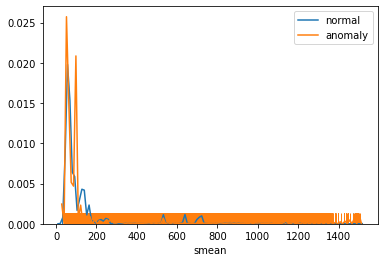

In [63]:
dual_plot('smean')

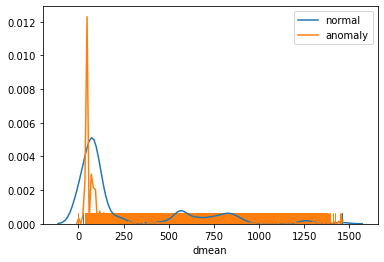

In [64]:
dual_plot('dmean')

In [65]:
total['smean_log1p'] = total['smean'].apply(np.log1p)
total['dmean_log1p'] = total['dmean'].apply(np.log1p)

# -0.02837244879012871 -0.2951728296856902 -0.05807468815031313 -0.5111549621216057
print(corr('smean'), corr('dmean'), corr('smean_log1p'), corr('dmean_log1p'))
# So we have better correlation with label after applying log1p. 
total.drop(['smean', 'dmean'], axis=1, inplace=True)

-0.02837244879017641 -0.2951728296847456 -0.05807473323268563 -0.5111549604108098


## spkts and dpkts
* spkts : Source to destination packet count 
* dpkts: Destination to source packet count

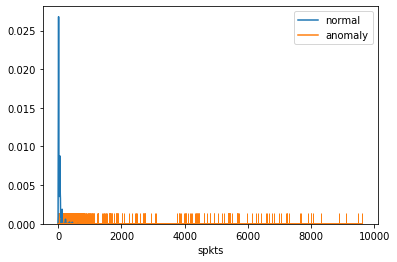

In [66]:
col = 'spkts'
dual_plot(col)

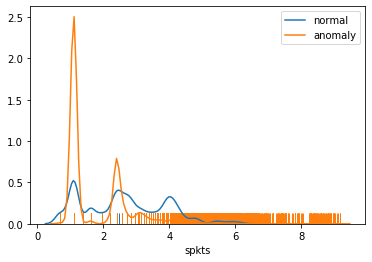

In [67]:
dual_plot(col, method=np.log1p)

In [68]:
total['spkts_log1p'] = total['spkts'].apply(np.log1p)
total['dpkts_log1p'] = total['dpkts'].apply(np.log1p)

# -0.043040466783819634 -0.09739388286233619 -0.3468819761209388 -0.45005074723539357
print(corr('spkts'), corr('dpkts'), corr('spkts_log1p'), corr('dpkts_log1p'))
# So we have better correlation with label after applying log1p. 
total.drop(['spkts', 'dpkts'], axis=1, inplace=True)

-0.043040466783783184 -0.09739388286214869 -0.3468819721673974 -0.4500507473368812


## sttl & dttl
* sttl: Source to destination time to live value 
* dttl: Destination to source time to live value

For sttl most of the anomalies have live values around 65 and 250. Its correlation with the target value is high too.
However, for dttl both types have nearly same distribution. So the correlation with target is very low.

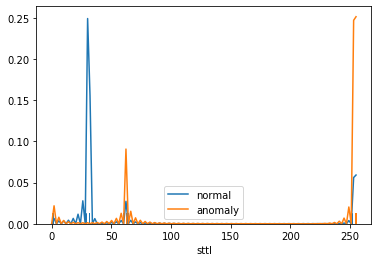

In [69]:
col = 'sttl'
dual_plot(col) # 0.62408238, after applying log1p 0.61556952425

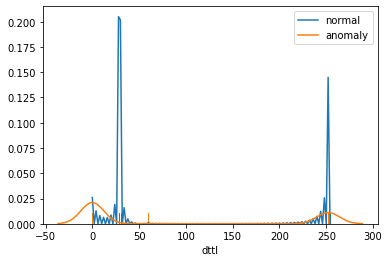

In [70]:
col = 'dttl'
dual_plot(col) # corr -0.09859087338578788

## sloss & dloss
* sloss: Source packets retransmitted or dropped 
* dloss: Destination packets retransmitted or dropped

Sloss is highly correlated with spkts and sbytes (more than .91). Similarly dloss is highly correlated with dpkts and dbytes. 
However, though packets sent is related loss of packets, this isn't quite linearly related like packet number and size. So we keep both for now.

Values are mostly between 0 to 3. Yet some values are more than several thousands.

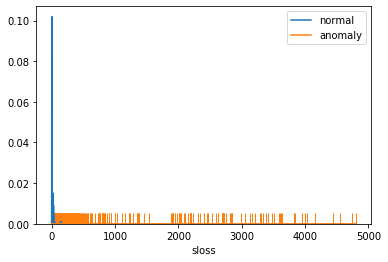

In [71]:
dual_plot('sloss')

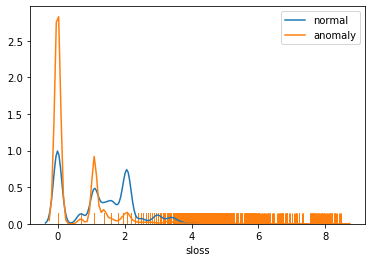

In [72]:
# So log1p makes it easier to differentiate
dual_plot('sloss', method=np.log1p)

In [73]:
total['sloss_log1p'] = total['sloss'].apply(np.log1p)
total['dloss_log1p'] = total['dloss'].apply(np.log1p)
# 0.001828274080103508 -0.07596097807462938 -0.3454351103223904 -0.3701913238787703
print(corr('sloss'), corr('dloss'), corr('sloss_log1p'), corr('dloss_log1p') )
total.drop(['sloss', 'dloss'], axis=1, inplace= True)

0.001828274080093212 -0.0759609780746232 -0.34543511070806077 -0.3701913234364305


## swin & dwin
TCP window advertisement value. Except 0 and 255 other values(1-254) occur mostly once only. So we can separate them into 3 groups. And we also see after binning their correlation with target remains same.

In [74]:
total['swin'].value_counts().loc[lambda x: x>1]

0      134632
255    123021
Name: swin, dtype: int64

In [75]:
total['dwin'].value_counts().loc[lambda x: x>1]

0      137157
255    120498
27          2
Name: dwin, dtype: int64

In [76]:
print(corr('swin'), corr('dwin'))

-0.36487721423192127 -0.3391656759085246


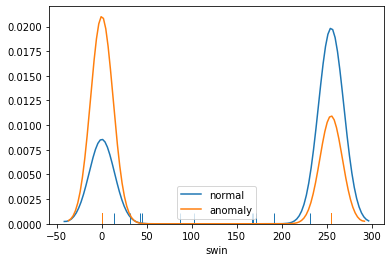

In [77]:
dual_plot('swin')

In [78]:
selected = ['swin', 'dwin']
kbins = preprocessing.KBinsDiscretizer(n_bins=[3, 3], encode='ordinal', strategy='uniform')
total[selected] = pd.DataFrame(kbins.fit_transform(total[selected]), columns=selected)
print(corr('swin'), corr('dwin'))

-0.3648685344294963 -0.33914336235333503


## stcpb & dtcpb
TCP base sequence number. It has a really big range, 0 to 5e9. However, anomaly connections are mostly around 0. 

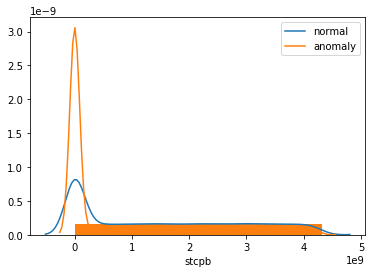

In [79]:
col = 'stcpb'
dual_plot(col)

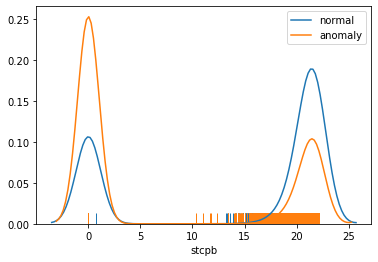

In [80]:
dual_plot(col, method=np.log1p)

In [81]:
total['stcpb_log1p'] = total['stcpb'].apply(np.log1p)
total['dtcpb_log1p'] = total['dtcpb'].apply(np.log1p)
# -0.2665849100492664 -0.2635428109654134 -0.33898970769021913 -0.33835676091281974
print(corr('stcpb'), corr('dtcpb'), corr('stcpb_log1p'), corr('dtcpb_log1p'))
total.drop(['stcpb', 'dtcpb'], axis=1, inplace= True)

-0.26658491004988316 -0.26354281096530374 -0.3389897076888727 -0.3383567609129128


### tcprtt & synack & ackdat
* tcprtt is the TCP connection setup round-trip time, the sum of ’synack’ and ’ackdat’.
* synack: TCP connection setup time, the time between the SYN and the SYN_ACK packets.
* ackdat : TCP connection setup time, the time between the SYN_ACK and the ACK packets.

As tcprtt, is just the sum of other two features, it doesn't add any extra info to our models. So we can just drop it for now.
Applying preprocessing on synack and ackdat didn't improve much. From graph we can see, anomaly connections generally have values around 0.

In [82]:
total.drop(['tcprtt'], axis=1, inplace=True)

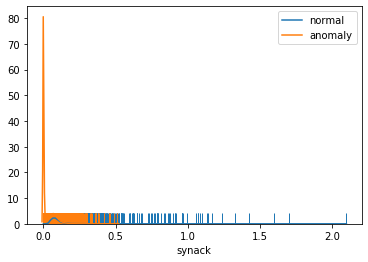

In [83]:
dual_plot('synack')

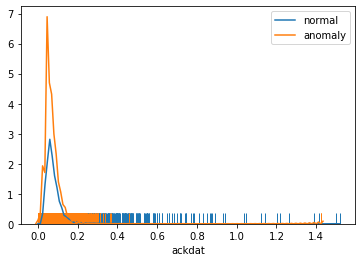

In [84]:
dual_plot('ackdat')

## trans_depth
Represents the pipelined depth into the connection of http request/response transaction. After depth 5 to 172 occurences are few.

In [85]:
col = 'trans_depth'
print(corr(col)) # -0.0022256544
create_count_df(col, total)

0.002245977533494535


,trans_depth,count,percent
0,0,232251,90.134007
1,1,25295,9.816706
2,2,108,0.041914
3,4,4,0.001552
4,3,4,0.001552
5,39,2,0.000776
6,5,2,0.000776
7,80,1,0.000388
8,172,1,0.000388
9,163,1,0.000388


## response_body_len
Actual uncompressed content size of the data transferred from the server’s http service. 
The values range between 0 to 5.24M.

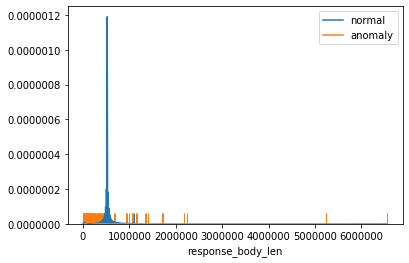

In [86]:
col = 'response_body_len'
dual_plot(col)

In [87]:
total["response_body_len_log1p"] = total["response_body_len"].apply(np.log1p)

# slight improve
# -0.018930127454048158 -0.03261972203078345
print(corr('response_body_len'), corr('response_body_len_log1p'))
total.drop(['response_body_len'], axis=1, inplace=True)

-0.018930127454016125 -0.07651272487741327


## ct_srv_src
No. of connections that contain the same service and source address in 100 connections according to the last time. Most of the normal connections are within 10. It is highly correlated to ct_srv_dst.

In [88]:
col = 'ct_srv_src'
print(total[col].value_counts())

1     49876
2     29616
3     24482
4     19895
5     16280
6     14562
7     11708
8      8092
9      6848
10     6341
33     4604
12     4331
11     4325
16     3549
14     3478
17     3011
13     2877
34     2788
18     2328
26     2328
29     2290
32     2108
28     2107
15     2028
27     1961
30     1946
31     1920
23     1896
24     1814
25     1721
22     1662
21     1629
19     1623
20     1344
37     1237
35     1136
36     1116
43     1012
39      895
38      795
40      695
45      523
42      488
44      485
41      416
46      320
51      279
47      227
50      156
49      154
52      111
48       89
63       63
59       30
54       27
53       26
58       25
Name: ct_srv_src, dtype: int64


0.24659616767805462


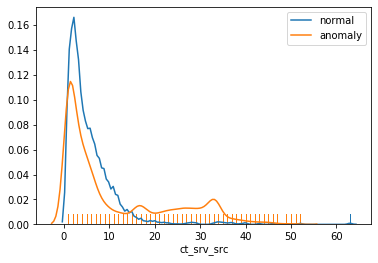

In [89]:
print(corr(col)) # 0.24659616767
dual_plot(col)

## ct_srv_dst
No. of connections that contain the same service and destination address in 100 connections according to the last time. It is highly correlated to ct_srv_src too. It has a slight better correlation with label than ct_srv_src. So the other one can be dropped to check for possible improvement.

1     58824
2     28745
3     24142
4     18809
5     15992
6     13406
7     10672
8      7311
9      6034
10     5878
33     4568
12     4138
11     4025
16     3580
14     3384
17     2977
34     2785
13     2508
18     2455
26     2310
29     2206
32     2124
28     2053
30     2002
27     1990
31     1949
25     1828
24     1770
23     1760
22     1549
15     1524
21     1479
20     1359
19     1304
37     1237
35     1206
36     1081
43      957
39      940
38      775
40      655
42      518
45      493
44      464
41      416
51      330
46      320
47      214
50      156
48      137
49      105
62       62
52       59
59       30
54       27
53       26
58       25
Name: ct_srv_dst, dtype: int64


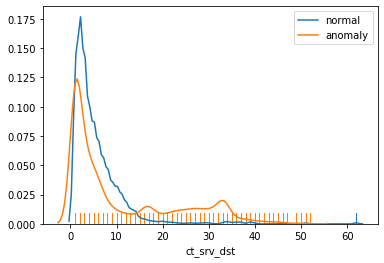

In [90]:
col = 'ct_srv_dst'
print(total[col].value_counts())
# graph is same as ct_srv_src
dual_plot(col)

In [91]:
# 0.2478122357. they are very correlated 0.97946681, need to check whether dropping one benefits
print(corr('ct_srv_dst'), corr('ct_srv_src', 'ct_srv_dst'))

0.2478122357172172 0.9794668130717727


## ct_src_ltm & ct_dst_ltm
No. of connections of the same source/destination address in 100 connections according to the last recorder time.
Values are well between 0 to 51 and very few values after 48. They are much correlated , but not to the point of dropping one.

In [92]:
col = 'ct_src_ltm'
print(corr(col))
create_count_df(col, total)

0.25249817658200413


,ct_src_ltm,count,percent
0,1,63870,24.787230
1,2,48965,19.002767
2,3,29180,11.324431
3,4,18863,7.320519
4,5,12297,4.772328
5,6,8573,3.327085
6,17,7613,2.954520
7,16,6817,2.645601
8,7,6263,2.430600
9,8,5804,2.252467


In [93]:
print(corr('ct_dst_ltm'))
create_count_df('ct_dst_ltm', total)

0.240776441215579


,ct_dst_ltm,count,percent
0,1,83627,32.454700
1,2,48640,18.876638
2,3,27434,10.646828
3,4,17313,6.718981
4,5,9441,3.663946
5,6,7473,2.900187
6,16,7112,2.760087
7,17,6796,2.637451
8,7,5927,2.300202
9,18,5663,2.197747


In [94]:
corr('ct_src_ltm', 'ct_dst_ltm')

0.9015817705707642

## ct_src_dport_ltm & ct_dst_sport_ltm
* ct_src_dport_ltm : No of connections of the same source address and the destination port in 100 connections according to the last time.
* ct_dst_sport_ltm: No of connections of the same destination address and the source port in 100 connections according to the last time.

In [95]:
for col in ['ct_src_dport_ltm', 'ct_dst_sport_ltm']:
    print(corr(col))
    print(create_count_df(col, total))

0.3185184197865368
    ct_src_dport_ltm   count    percent
0                  1  135974  52.769984
1                  2   36610  14.207930
2                  3   14495   5.625347
3                 16    8927   3.464469
4                  4    8651   3.357356
5                 17    6631   2.573417
6                  6    4306   1.671110
7                 18    4176   1.620659
8                  7    3448   1.338130
9                  5    2979   1.156116
10                33    2711   1.052109
11                14    2329   0.903859
12                 8    2196   0.852243
13                25    2085   0.809165
14                10    2042   0.792477
15                12    1812   0.703217
16                13    1802   0.699336
17                11    1697   0.658587
18                 9    1641   0.636854
19                15    1615   0.626763
20                34    1410   0.547205
21                43     952   0.369461
22                32     841   0.326383
23                20 

In [119]:
corr('ct_src_dport_ltm', 'ct_dst_sport_ltm')

0.9083371617431901

# Decimal Features
## dur 
recorded total duration. Normal connections are mostly within 5. However, this feature has a poor correlation with label.


0.029096117024572817


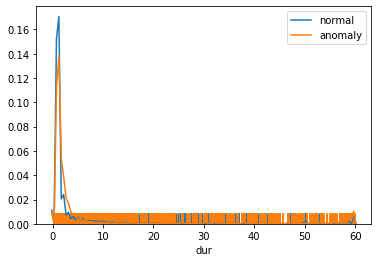

In [96]:
col = 'dur'
print(corr(col)) # 0.0290961170, correlation gets worse after log1p
dual_plot(col)

## rate
This feature isn't mentioned is feature list. It has value upto 1M. Anomaly connections are mostly around 0.

0.335882638820406


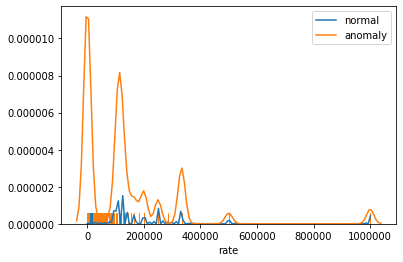

In [97]:
col = 'rate'
print(corr(col))
dual_plot(col) # cor 0.3358, after applying log1p it becomes 0.31581108

## sinpkt & dinpkt
* sinpkt: Source interpacket arrival time (mSec)
* dinpkt: Destination interpacket arrival time (mSec)

sinpkt is highly correlated with is_sm_ips_ports (0.9421206). Will dropping one of them benefit ?

In [98]:
col = 'sinpkt'
corr(col, 'is_sm_ips_ports')

0.9421206233368904

-0.15545369808669798


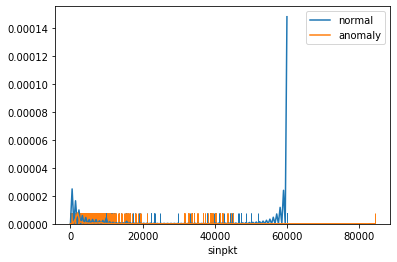

In [99]:
print(corr(col)) # corr -0.1554536980863
dual_plot(col) 

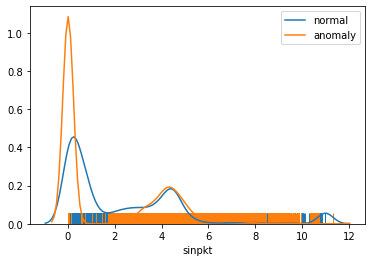

In [100]:
dual_plot(col, method=np.log1p)

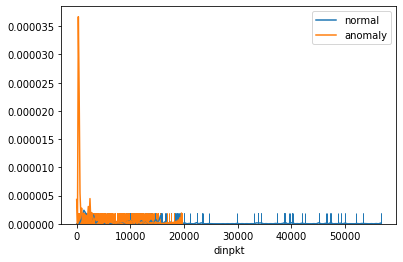

In [101]:
dual_plot('dinpkt')

In [102]:
total['sinpkt_log1p'] = total['sinpkt'].apply(np.log1p)
total['dinpkt_log1p'] = total['dinpkt'].apply(np.log1p)

# slight improve in correlation
# -0.1554536980867726 -0.030136042428744566 -0.16119699304378052 -0.07408113676641241
print(corr('sinpkt'), corr('dinpkt'), corr('sinpkt_log1p'), corr('dinpkt_log1p'))
total.drop(['sinpkt', 'dinpkt'], axis=1, inplace= True)

-0.15545369808669798 -0.030136042428568287 -0.16119699302680146 -0.07408113678212713


## sload & dload
* sload: Source bits per second
* dload: Destination bits per second

The values are really big and in bits.

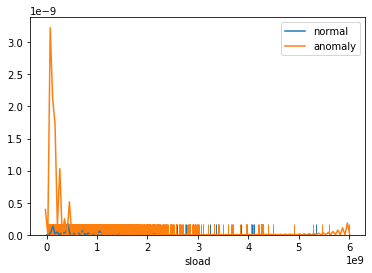

In [103]:
dual_plot('sload')

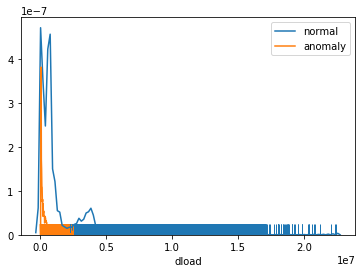

In [104]:
dual_plot('dload')

In [105]:
total['sload_log1p'] = total['sload'].apply(np.log1p)
total['dload_log1p'] = total['dload'].apply(np.log1p)
# 0.16524867685764016 -0.35216880416636837 0.3397788822586144 -0.5919440288535992
print(corr('sload'), corr('dload'), corr('sload_log1p'), corr('dload_log1p'))
total.drop(['sload', 'dload'], axis=1, inplace=True)

0.16524867685755187 -0.3521688041654803 0.3397788821748469 -0.591944028892159


## sjit & djit
Source and Destination jitter in mSec. Preprocessing didn't improve anything.

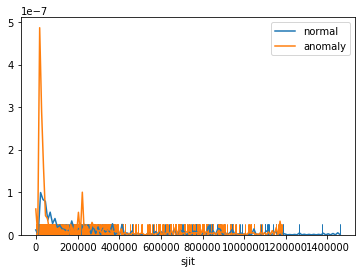

In [106]:
dual_plot('sjit')

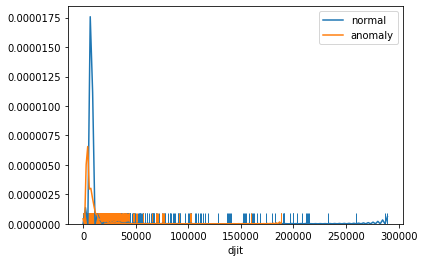

In [107]:
dual_plot('djit')

# Output

## dimensionality reduction , 

In machine learning, “dimensionality” simply refers to the number of features (i.e. input variables) in your dataset.
When the number of features is very large relative to the number of observations in your dataset, certain algorithms struggle to train effective models

## Feature selection 

In [212]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [214]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.21.3


In [218]:
from sklearn.ensemble import RandomForestClassifier

In [256]:
#df.describe

In [255]:
#df.columns[1:]

In [260]:
# X_train is independent varriable and y_train is the predicted varriable

X_train, y_train = make_classification(n_samples=10000,
                           n_features=10,
                           n_informative=2,
                           n_redundant=2,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

In [261]:
feat_labels=df.columns[1:]
forest = RandomForestClassifier(n_estimators=10000 , random_state =0 , n_jobs=-1)
forest.fit(X_train , y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
for f in range (X_train.shape[1]):
    print("%2d) %-*s %f" %(f + 1, 30, feat_labels[f], importances[indices[f]]))

 1) attack_cat                     0.317085
 2) ct_dst_ltm                     0.228130
 3) ct_dst_sport_ltm               0.204782
 4) ct_dst_src_ltm                 0.105039
 5) ct_flw_http_mthd               0.025072
 6) ct_ftp_cmd                     0.024634
 7) ct_src_dport_ltm               0.024534
 8) ct_src_ltm                     0.024414
 9) ct_srv_dst                     0.023616
10) ct_srv_src                     0.022695


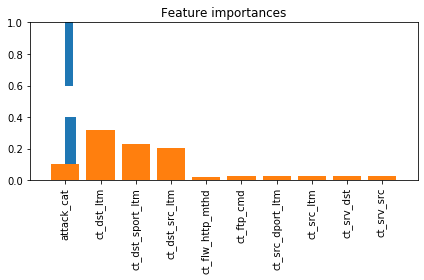

<Figure size 1800x1800 with 0 Axes>

In [277]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
plt.figure()
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylim(ymin=0)
plt.ylim(ymax=1)
plt.tight_layout()
plt.bar([X_train for X_train in range(len(importances))], importances)
plt.figure(figsize =(25,25))
plt.show()

In [254]:

# # random forest for feature importance on a regression problem
# from sklearn.datasets import make_regression
# from sklearn.ensemble import RandomForestRegressor
# from matplotlib import pyplot
# # define dataset
# X_train, y_train = make_regression(n_samples=1000, n_features=48, n_informative=5, random_state=1)
# # define the model
# model = RandomForestRegressor()
# # fit the model
# model.fit(X_train, y_train)
# # get importance
# importance = model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()


In [252]:
# # random forest for feature importance on a classification problem
# from sklearn.datasets import make_classification
# from sklearn.ensemble import RandomForestClassifier
# from matplotlib import pyplot
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=0)
# feat_labels=df.columns[1:]
# # define the model
# model = RandomForestClassifier()
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()
# # random forest for feature importance on a classification problem
# from sklearn.datasets import make_classification
# from sklearn.ensemble import RandomForestClassifier
# from matplotlib import pyplot
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# # define the model
# model = RandomForestClassifier()
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()


In [315]:
#df.columns[:,26:27]
#df.iloc[:,0:47]

IndexError: too many indices for array

In [ ]:
# Draw covarriance the matrix 

import pandas as pd
import numpy as np
import seaborn as sns
data = df
X = data.iloc[:,0:47]  #independent columns
y = data.iloc[:,1]    #target column i.e label ( attack_cat)
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(48,48))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Feature selection criteria
https://blog.datadive.net/selecting-good-features-part-iii-random-forests/

In [284]:
df.columns[1:]

Index(['attack_cat', 'ct_dst_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_flw_http_mthd', 'ct_ftp_cmd', 'ct_src_dport_ltm', 'ct_src_ltm',
       'ct_srv_dst', 'ct_srv_src', 'ct_state_ttl', 'dbytes', 'dinpkt', 'djit',
       'dload', 'dloss', 'dmean', 'dpkts', 'dtcpb', 'dttl', 'dur', 'dwin',
       'id', 'is_ftp_login', 'is_sm_ips_ports', 'label', 'proto', 'rate',
       'response_body_len', 'sbytes', 'service', 'sinpkt', 'sjit', 'sload',
       'sloss', 'smean', 'spkts', 'state', 'stcpb', 'sttl', 'swin', 'synack',
       'tcprtt', 'trans_depth', 'type', 'protocol_type', 'service_type',
       'state_type'],
      dtype='object')

In [295]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# we have dropped attack_cat ,proto , service , state as they are catagorical varriables 

X=df[['ct_dst_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_flw_http_mthd', 'ct_ftp_cmd', 'ct_src_dport_ltm', 'ct_src_ltm',
       'ct_srv_dst', 'ct_srv_src', 'ct_state_ttl', 'dbytes', 'dinpkt', 'djit',
       'dload', 'dloss', 'dmean', 'dpkts', 'dtcpb', 'dttl', 'dur', 'dwin',
       'id', 'is_ftp_login', 'is_sm_ips_ports' , 'rate',
       'response_body_len', 'sbytes',  'sinpkt', 'sjit', 'sload',
       'sloss', 'smean', 'spkts', 'stcpb', 'sttl', 'swin', 'synack',
       'tcprtt', 'trans_depth', 'type', 'protocol_type', 'service_type',
       'state_type']]  # Features
y=df['label']  # Labels



In [316]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
# transform the data 
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)


In [297]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


ValueError: could not convert string to float: 'test'

In [298]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
#clf.fit(X_train,y_train)

In [300]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [301]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=df.feature_names).sort_values(ascending=False)
feature_imp

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [288]:
df.head(5)

,ackdat,attack_cat,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_flw_http_mthd,ct_ftp_cmd,ct_src_dport_ltm,ct_src_ltm,ct_srv_dst,ct_srv_src,ct_state_ttl,dbytes,dinpkt,djit,dload,dloss,dmean,dpkts,dtcpb,dttl,dur,dwin,id,is_ftp_login,is_sm_ips_ports,label,proto,rate,response_body_len,sbytes,service,sinpkt,sjit,sload,sloss,smean,spkts,state,stcpb,sttl,swin,synack,tcprtt,trans_depth,type,protocol_type,service_type,state_type
0,0.0,Normal,1,1,2,0,0,1,1,2,2,2,0,0.0,0.0,0.0,0,0,0,0,0,0.000011,0,1,0,0,0,udp,90909.0902,0,496,-,0.011,0.0,180363632.0,0,248,2,INT,0,254,0,0.0,0.0,0,test,119,0,5
1,0.0,Normal,1,1,2,0,0,1,1,2,2,2,0,0.0,0.0,0.0,0,0,0,0,0,0.000008,0,2,0,0,0,udp,125000.0003,0,1762,-,0.008,0.0,881000000.0,0,881,2,INT,0,254,0,0.0,0.0,0,test,119,0,5
2,0.0,Normal,1,1,3,0,0,1,1,3,3,2,0,0.0,0.0,0.0,0,0,0,0,0,0.000005,0,3,0,0,0,udp,200000.0051,0,1068,-,0.005,0.0,854400000.0,0,534,2,INT,0,254,0,0.0,0.0,0,test,119,0,5
3,0.0,Normal,2,1,3,0,0,2,2,3,3,2,0,0.0,0.0,0.0,0,0,0,0,0,0.000006,0,4,0,0,0,udp,166666.6608,0,900,-,0.006,0.0,600000000.0,0,450,2,INT,0,254,0,0.0,0.0,0,test,119,0,5
4,0.0,Normal,2,1,3,0,0,2,2,3,3,2,0,0.0,0.0,0.0,0,0,0,0,0,0.000010,0,5,0,0,0,udp,100000.0025,0,2126,-,0.010,0.0,850400000.0,0,1063,2,INT,0,254,0,0.0,0.0,0,test,119,0,5


In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

In [108]:
features.to_csv('features.csv', index=False)
train = total[total['type']=='train'].drop(['type'], axis=1)
test = total[total['type']!='train'].drop(['type'], axis=1)
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [111]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [112]:
import numpy as np
import tensorflow as tf
import random as rn
np.random.seed(123)
rn.seed(123)
#single thread
session_conf =tf.compat.v1.ConfigProto(
#session_conf = tf.ConfigProto(
intra_op_parallelism_threads=1,
inter_op_parallelism_threads=1)
from keras import backend as K
tf.set_random_seed(123)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

import models.lstm as lstm
import configuration.config as cfg
import matplotlib

if cfg.run_config['Xserver'] == False:
    print ("No X-server")
    matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import time
from keras.utils import plot_model
import utilities.utils as util
import numpy as np
import logging


# import plotly
# import plotly.plotly as py
# import plotly.graph_objs as go
# plotly.tools.set_credentials_file(username='aakashsingh', api_key='iMfR7hS1dbnmJ9XB17XO')

import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
sns.set_style("whitegrid")


AttributeError: module 'tensorflow' has no attribute 'set_random_seed'

In [ ]:
def make_plots(context,predictions_timesteps,true_values,look_ahead,title,path,save_figure,Xserver):
    step = 1
    if look_ahead > 1:
        step = look_ahead - 1
    for idx, i in enumerate(np.arange(0, look_ahead, step)):
        fig = plt.figure()
        #plt.title(title+" Timestep: %d "%i)
        plt.xlabel("Time step")
        plt.ylabel("Power Consumption")
        plt.plot(true_values, label="True value", linewidth=1,color=sns.xkcd_rgb["denim blue"])
        plt.plot(predictions_timesteps[:, i], label="Predicted value", linewidth=1, linestyle="--",color=sns.xkcd_rgb["medium green"])
        error = abs(true_values - predictions_timesteps[:, i])
        plt.plot(error, label='Error',color=sns.xkcd_rgb["pale red"], linewidth=0.5)
        plt.legend(bbox_to_anchor=(1, .99))
        plt.tight_layout()
        if save_figure:
            util.save_figure(path,"%s_timestep_%d"%(context,i), fig)

    if Xserver:
        plt.show()


In [ ]:
def get_predictions(context,model,X,y,train_scaler,batch_size,look_ahead,look_back,epochs,experiment_id):
    predictions = model.predict(X, batch_size=batch_size)
    print predictions.shape
    predictions = train_scaler.inverse_transform(predictions)
    y = train_scaler.inverse_transform(y)

    # extract first timestep for true values
    y_true = y[:, 0].flatten()

    # diagonals contains a reading's values calculated at different points in time
    diagonals = util.get_diagonals(predictions)

    # the top left and bottom right predictions do not contain predictions for all timesteps
    # fill the missing prediction values in diagonals. curenttly using the first predicted value for all missing timesteps
    for idx, diagonal in enumerate(diagonals):
        diagonal = diagonal.flatten()
        # missing value filled with the first value
        diagonals[idx] = np.hstack((diagonal, np.full(look_ahead - len(diagonal), diagonal[0])))
    predictions_timesteps = np.asarray(diagonals)

    for i in range(look_ahead):
        logging.info("%s RMSE on %d timestep prediction %f" % ( context,
            (i + 1), mean_squared_error(y_true, predictions_timesteps[:, i]) ** 0.5))

    shifted_1 = util.shift_time_series(y_true, 1)

    logging.info(" %s RMSE Naive One Timestep Shift %f",context,
                 mean_squared_error(y_true[1:], shifted_1[1:]) ** 0.5)

    title = "Prediction on %s data. %d epochs, look back %d, look_ahead %d & batch_size %d." % (
                 context, epochs, look_back, look_ahead, batch_size)
    path = "%s/%s/"%("imgs",experiment_id)
    make_plots(context,predictions_timesteps,y_true,look_ahead,title,path,cfg.run_config['save_figure'],
               cfg.run_config['Xserver'])

    return predictions_timesteps, y_true

In [ ]:
def run():
    #load config settings
    experiment_id = cfg.run_config['experiment_id']
    data_folder = cfg.run_config['data_folder']
    look_back = cfg.multi_step_lstm_config['look_back']
    look_ahead = cfg.multi_step_lstm_config['look_ahead']
    batch_size = cfg.multi_step_lstm_config['batch_size']
    epochs = cfg.multi_step_lstm_config['n_epochs']
    dropout = cfg.multi_step_lstm_config['dropout']
    layers = cfg.multi_step_lstm_config['layers']
    loss = cfg.multi_step_lstm_config['loss']
    # optimizer = cfg.multi_step_lstm_config['optimizer']
    shuffle = cfg.multi_step_lstm_config['shuffle']
    patience = cfg.multi_step_lstm_config['patience']
    validation = cfg.multi_step_lstm_config['validation']
    learning_rate = cfg.multi_step_lstm_config['learning_rate']
    logging.info("----------------------------------------------------")
    logging.info('Run id %s' % (experiment_id))

    logging.info(" HYPERPRAMRAMS : %s" % (str(locals())))

    train_scaler, X_train, y_train, X_validation1, y_validation1, X_validation2, y_validation2, validation2_labels, \
    X_test, y_test, test_labels = util.load_data(data_folder, look_back, look_ahead)



    multistep_lstm = lstm.MultiStepLSTM( look_back=look_back, look_ahead=look_ahead,
                                          layers=layers,
                                          dropout=dropout, loss=loss, learning_rate=learning_rate)
    model = multistep_lstm.build_model()
    if cfg.run_config['save_figure']:
        plot_model(model, to_file="imgs/%s_lstm.png"%(experiment_id), show_shapes=True, show_layer_names=True)
    # train model on training set. validation1 set is used for early stopping

    fig = plt.figure()
    history = lstm.train_model(model, X_train, y_train, batch_size, epochs, shuffle, validation, (X_validation1, y_validation1), patience)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    if cfg.run_config['save_figure']:
        util.save_figure("%s/%s/" % ("imgs", experiment_id), "train_errors", fig)

    validation2_loss = model.evaluate(X_validation2, y_validation2, batch_size=batch_size, verbose=2)
    print "Validation2 Loss %s" % (validation2_loss)
    logging.info("Validation2 Loss %s" % (validation2_loss))
    test_loss = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)
    print "Test Loss %s" % (test_loss)
    logging.info("Test Loss %s" % (test_loss))

    predictions_train, y_true_train = get_predictions("Train", model, X_train, y_train, train_scaler,
                                                               batch_size, look_ahead, look_back, epochs, experiment_id,
                                                               )
    np.save(data_folder + "train_predictions", predictions_train)
    np.save(data_folder + "train_true",y_true_train)

    predictions_validation1, y_true_validation1 = get_predictions("Validation1", model, X_validation1, y_validation1,
                                                                  train_scaler, batch_size, look_ahead, look_back,
                                                                  epochs, experiment_id,
                                                                  )
    predictions_validation1_scaled = train_scaler.transform(predictions_validation1)
    print "Calculated validation1 loss %f" % (mean_squared_error(
        np.reshape(y_validation1, [len(y_validation1), look_ahead]),
        np.reshape(predictions_validation1_scaled, [len(predictions_validation1_scaled), look_ahead])))
    np.save(data_folder + "validation1_predictions", predictions_validation1)
    np.save(data_folder + "validation1_true", y_true_validation1)
    np.save(data_folder + "validation1_labels", validation2_labels)

    predictions_validation2, y_true_validation2 = get_predictions("Validation2", model, X_validation2, y_validation2,
                                                                  train_scaler, batch_size, look_ahead, look_back,
                                                                  epochs, experiment_id,
                                                                 )
    predictions_validation2_scaled = train_scaler.transform(predictions_validation2)
    print "Calculated validation2 loss %f"%(mean_squared_error(
        np.reshape(y_validation2, [len(y_validation2), look_ahead]),
        np.reshape(predictions_validation2_scaled, [len(predictions_validation2_scaled), look_ahead])))
    np.save(data_folder + "validation2_predictions", predictions_validation2)
    np.save(data_folder + "validation2_true", y_true_validation2)
    np.save(data_folder + "validation2_labels", validation2_labels)


    predictions_test, y_true_test = get_predictions("Test", model, X_test, y_test, train_scaler, batch_size, look_ahead,
                                                    look_back, epochs, experiment_id,
                                                   )
    predictions_test_scaled = train_scaler.transform(predictions_test)
    print "Calculated test loss %f" % (mean_squared_error( np.reshape(y_test, [len(y_test),look_ahead]),
                                       np.reshape(predictions_test_scaled, [len(predictions_test_scaled),look_ahead])))

    np.save(data_folder + "test_predictions", predictions_test)
    np.save(data_folder + "test_true", y_true_test)
    np.save(data_folder + "test_labels", test_labels)
    logging.info("-------------------------run complete----------------------------------------------")


if __name__ == "__main__":
    # load config params
    FORMAT = '%(asctime)-15s. %(message)s'
    logger = logging.basicConfig(filename=cfg.run_config['log_file'], level=logging.INFO, format=FORMAT)
    run()
    logging.info("")